In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("pastel")

In [2]:
df = pd.read_csv('./Invistico_Airline.csv')

# strip whitespace in columns
df.columns = [col.replace(' ', '') for col in df.columns]
df.head()

,satisfaction,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,Departure/Arrivaltimeconvenient,Foodanddrink,Gatelocation,...,Onlinesupport,EaseofOnlinebooking,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


# Investigate Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   satisfaction                     129880 non-null  object 
 1   CustomerType                     129880 non-null  object 
 2   Age                              129880 non-null  int64  
 3   TypeofTravel                     129880 non-null  object 
 4   Class                            129880 non-null  object 
 5   FlightDistance                   129880 non-null  int64  
 6   Seatcomfort                      129880 non-null  int64  
 7   Departure/Arrivaltimeconvenient  129880 non-null  int64  
 8   Foodanddrink                     129880 non-null  int64  
 9   Gatelocation                     129880 non-null  int64  
 10  Inflightwifiservice              129880 non-null  int64  
 11  Inflightentertainment            129880 non-null  int64  
 12  On

In [4]:
df.isna().sum()

satisfaction                         0
CustomerType                         0
Age                                  0
TypeofTravel                         0
Class                                0
FlightDistance                       0
Seatcomfort                          0
Departure/Arrivaltimeconvenient      0
Foodanddrink                         0
Gatelocation                         0
Inflightwifiservice                  0
Inflightentertainment                0
Onlinesupport                        0
EaseofOnlinebooking                  0
On-boardservice                      0
Legroomservice                       0
Baggagehandling                      0
Checkinservice                       0
Cleanliness                          0
Onlineboarding                       0
DepartureDelayinMinutes              0
ArrivalDelayinMinutes              393
dtype: int64

In [5]:
# there are a lot of null values for arrival delay, let's fill in these records with the median value
df.fillna(value = df.ArrivalDelayinMinutes.median(), inplace = True)

In [6]:
df.isna().sum()

satisfaction                       0
CustomerType                       0
Age                                0
TypeofTravel                       0
Class                              0
FlightDistance                     0
Seatcomfort                        0
Departure/Arrivaltimeconvenient    0
Foodanddrink                       0
Gatelocation                       0
Inflightwifiservice                0
Inflightentertainment              0
Onlinesupport                      0
EaseofOnlinebooking                0
On-boardservice                    0
Legroomservice                     0
Baggagehandling                    0
Checkinservice                     0
Cleanliness                        0
Onlineboarding                     0
DepartureDelayinMinutes            0
ArrivalDelayinMinutes              0
dtype: int64

In [7]:
# split dataframe into categorical and numeric variables
df_cat = df[['CustomerType', 'TypeofTravel', 'Class', 'satisfaction']].copy()
df_num = df.copy()
df_num.drop(labels = ['CustomerType', 'TypeofTravel', 'Class'], axis = 1, inplace = True)

In [8]:
df_cat.head()

,CustomerType,TypeofTravel,Class,satisfaction
0,Loyal Customer,Personal Travel,Eco,satisfied
1,Loyal Customer,Personal Travel,Business,satisfied
2,Loyal Customer,Personal Travel,Eco,satisfied
3,Loyal Customer,Personal Travel,Eco,satisfied
4,Loyal Customer,Personal Travel,Eco,satisfied


In [9]:
df_num.head()

,satisfaction,Age,FlightDistance,Seatcomfort,Departure/Arrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,Onlinesupport,EaseofOnlinebooking,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
0,satisfied,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [10]:
df_num[df_num.DepartureDelayinMinutes>0].head(10)

,satisfaction,Age,FlightDistance,Seatcomfort,Departure/Arrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,Onlinesupport,EaseofOnlinebooking,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
1,satisfied,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
6,satisfied,66,227,0,0,0,3,2,5,5,5,5,0,5,5,5,3,17,15.0
9,satisfied,22,1556,0,0,0,3,2,0,2,2,2,4,5,3,4,2,30,26.0
10,satisfied,58,104,0,0,0,3,3,3,3,3,3,0,1,2,3,5,47,48.0
14,satisfied,47,84,0,1,0,1,5,2,1,5,5,0,5,2,5,2,40,48.0
16,satisfied,13,3693,0,1,0,2,4,0,4,4,4,4,1,3,1,4,5,0.0
27,satisfied,42,470,0,1,0,2,3,2,2,3,3,0,3,1,3,4,2,23.0
30,satisfied,62,2948,0,1,0,3,5,0,5,5,4,1,2,2,2,5,34,19.0
31,satisfied,21,2823,0,1,0,3,2,0,2,2,2,2,2,2,3,2,4,0.0
39,satisfied,31,2162,0,1,0,3,2,0,3,2,1,4,2,1,2,2,13,0.0


# Categoical Variable Exploration

In [11]:
df_cat.satisfaction.value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [12]:
# transform satisfaction variable to 0s and 1s for analysis
df_cat.satisfaction = df_cat.satisfaction.replace({'satisfied': 1, 'dissatisfied': 0})

## Customer Type

In [13]:
df_cat.groupby('CustomerType').aggregate({'satisfaction': 'mean'})

,satisfaction
CustomerType,
Loyal Customer,0.616277
disloyal Customer,0.239697


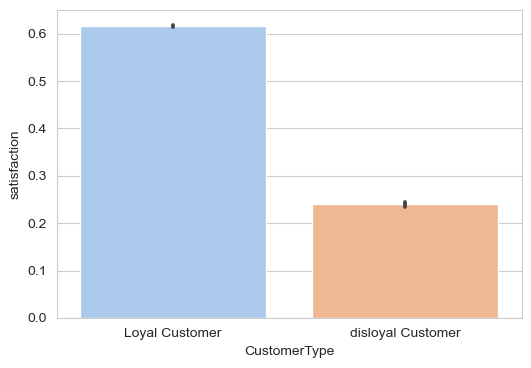

In [14]:
plt.figure(figsize = (6,4))
sns.barplot(data = df_cat, x = 'CustomerType', y = 'satisfaction')
plt.show()

## Type of Travel

In [15]:
df_cat.groupby('TypeofTravel').aggregate({'satisfaction': 'mean'})

,satisfaction
TypeofTravel,
Business travel,0.583724
Personal Travel,0.466096


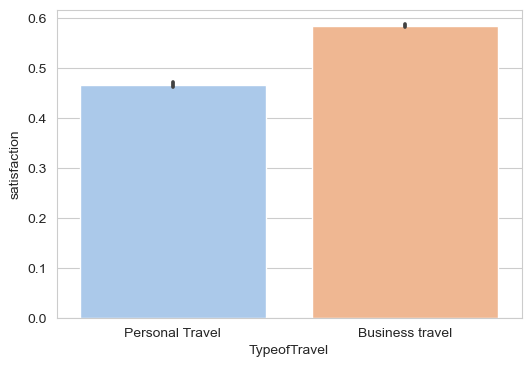

In [16]:
plt.figure(figsize = (6,4))
sns.barplot(data = df_cat, x = 'TypeofTravel', y = 'satisfaction')
plt.show()

## Class

In [17]:
df_cat.groupby('Class').aggregate({'satisfaction': 'mean'})

,satisfaction
Class,
Business,0.709379
Eco,0.393987
Eco Plus,0.427053


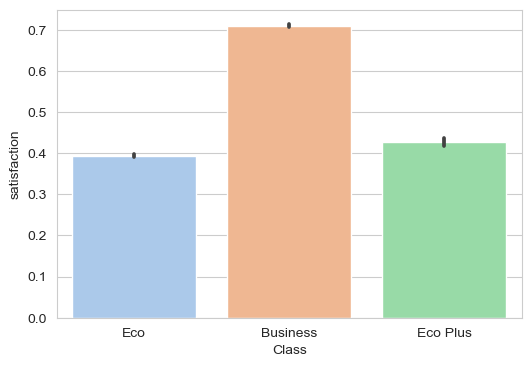

In [18]:
plt.figure(figsize = (6,4))
sns.barplot(data = df_cat, x = 'Class', y = 'satisfaction')
plt.show()

# Categorical Variable Conclusion

<ul>
    <li>
        <p style="font-size: 14px">
            <strong style="font-size: 16px">Customer Type:</strong>
            Loyal customers are satisfied ~62% of the time while disloyal customers are satisfied ~24% of the time.
        </p>
    </li>
    <li>
        <p style="font-size: 14px">
            <strong style="font-size: 16px">Type of Travel</strong>
            Passengers flying for "business" are more likely than customers who aren't flying for business.
        </p>
    </li>
    <li>
        <p style="font-size: 14px">
            <strong style="font-size: 16px">Class</strong>
            Business class customers are satisfied 71% of the time while non-business class customers are satisfied ~40% of the time.
        </p>
    </li>
</ul>

# Numerical Variable Exploration

In [19]:
# let's start by grouping variables by whether or not a customer is satisfied
# This way, we can quickly locate the more important independent variables

df_num.groupby('satisfaction').mean()

,Age,FlightDistance,Seatcomfort,Departure/Arrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,Onlinesupport,EaseofOnlinebooking,On-boardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
satisfaction,,,,,,,,,,,,,,,,,,
dissatisfied,37.466671,2025.709234,2.467335,3.016686,2.660419,3.007756,2.919854,2.608644,2.959213,2.852261,2.973126,3.052625,3.364601,2.971850,3.377324,2.869695,17.807749,18.445427
satisfied,41.050051,1944.770281,3.145653,2.969108,3.010438,2.976086,3.521460,4.024308,3.983260,3.984751,3.871946,3.844247,3.969488,3.645955,3.977394,3.751966,12.154768,12.233503


There are a few variables that immediately seem to jump out here.  
<ul>
    <li>
        Age
    </li>
    <li>
        In Flight Wifi Service
    </li>
    <li>
        Departure Delay in Minutes
    </li>
</ul>

Let's explore these variables visually to see these differences.

## Age

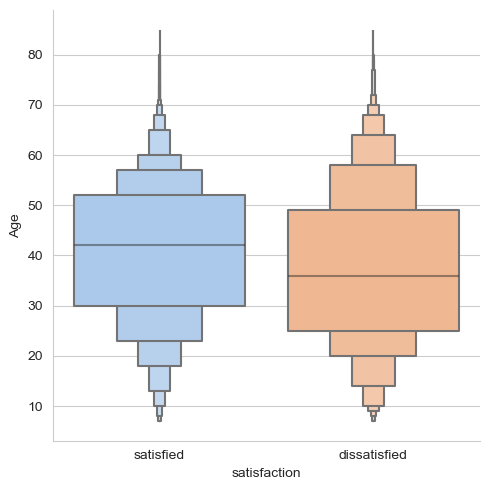

In [20]:
sns.catplot(data = df, x = 'satisfaction', y = 'Age', kind = 'boxen')
plt.show()

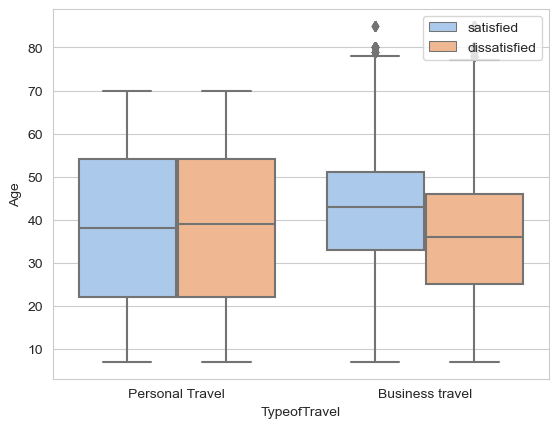

In [21]:
sns.boxplot(data = df, x = 'TypeofTravel', y = 'Age', hue = 'satisfaction')
plt.legend(loc = 'upper right')
plt.show()

## In Flight Wifi Service

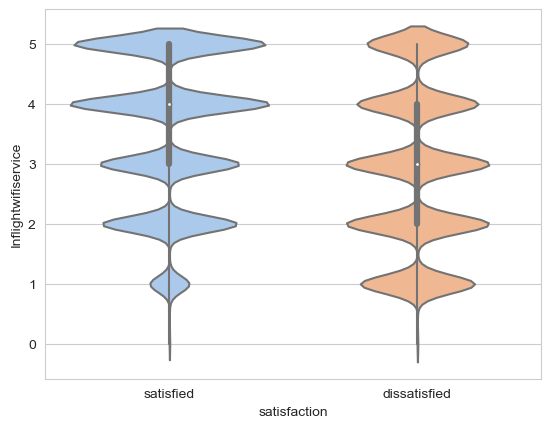

In [22]:
sns.violinplot(data = df, x = 'satisfaction', y = 'Inflightwifiservice')
plt.show()

In [23]:
wifi_group = df.groupby(['satisfaction', 'Inflightwifiservice']).aggregate({'CustomerType': 'count'})\
    .rename(columns = {'CustomerType': 'Count'})


# reorient dataframe for easier calculation of percentages
wifi_group = wifi_group.unstack().transpose()
wifi_group.index = np.arange(0,6)

# calculate percentage
wifi_group['PercentageOfDissatisfied'] = wifi_group.dissatisfied / wifi_group.dissatisfied.sum()
wifi_group['PercentageOfSatisified'] = wifi_group.satisfied / wifi_group.satisfied.sum()

wifi_group

satisfaction,dissatisfied,satisfied,PercentageOfDissatisfied,PercentageOfSatisified
0,73,59,0.001242,0.000830
1,10762,3949,0.183049,0.055552
2,13464,13581,0.229007,0.191048
3,13535,14067,0.230214,0.197884
4,11423,20137,0.194292,0.283273
5,9536,19294,0.162196,0.271414


## Departure Delay

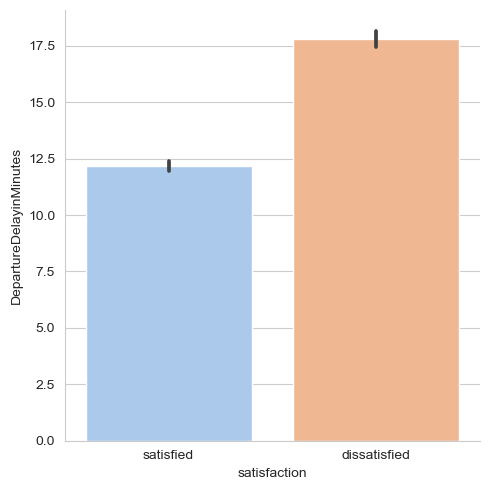

In [24]:
sns.catplot(data = df, x = 'satisfaction', y = 'DepartureDelayinMinutes', kind = 'bar')
plt.show()

# Numeric Variable Conclusion

<ul>
    <li>
        <p style="font-size: 14px">
            <strong style="font-size: 16px">Age:</strong>
            The median age of a satisfied customer is 41 while the median age of a dissatisfied customer is 37.
        </p>
    </li>
    <li>
        <p style="font-size: 14px">
            <strong style="font-size: 16px">In flight Wifi service: </strong>
            27% of satisfied customers rated the in flight wifi service as a 5 while only
            16% of dissatisfied customers rated the in flight wifi service as a 5.
        </p>
    </li>
    <li>
        <p style="font-size: 14px">
            <strong style="font-size: 16px">Departure Delay in Minutes: </strong>
            A dissatisfied customer is delayed by 5 more minutes on average than a satisfied customer.
        </p>
    </li>
</ul>